In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

import causality as intest
import viz

In [23]:
f = lambda x: np.tanh(x) + 2*np.sin(2*x) + x**3

In [74]:
target = 1 # By defaul X->Y
nb_samples = 40

Nx = {
    'name': 'uniform',
    'var': 10
}

Ny = {
    'name': 'normal',
    'var': 20
    # 4.86 - 87 - 88
}

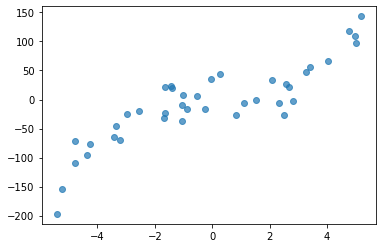

In [75]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x.reshape(-1, 1)
y = binary_am.y
viz.pretty_scatter(x, y)

In [76]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

In [77]:
# Define kernel parameters. 
l = 0.001
sigma_f = 2

# Define kernel object. 
# kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) \
#             * RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2)) \
#             + WhiteKernel(noise_level=100, noise_level_bounds=(1e-10, 1e+1))
kernel = RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2)) \
            

In [92]:
clf = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.2)
clf.fit(x, y)

GaussianProcessRegressor(alpha=0.2, copy_X_train=True,
                         kernel=RBF(length_scale=0.001),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

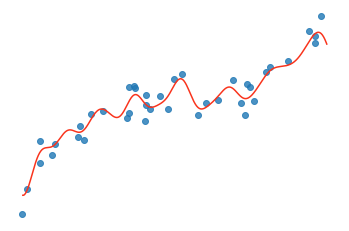

In [95]:
x_linspace = np.atleast_2d(np.linspace(-5.4, 5.4, 1000)).T
y_pred = clf.predict(x_linspace)

plt.plot(x_linspace, y_pred, c=viz.color_map(1, 1.6))
# plt.plot(x_linspace, f(x_linspace), c='g')
plt.scatter(x, y, alpha=.8)
plt.axis('off')
plt.savefig('gp_overfit')